# EDA - Invertir en un piso de alquiler vacacional en Málaga

In [96]:

### IMPORTACIONES Y AJUSTES


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# Algunas configuraciones de los paquetes
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8-white')
sns.set(color_codes=True)

In [97]:

### IMPORTAMOS NUESTROS DATASETS PREVIAMENTE LIMPIADOS


data_idealista_venta = pd.read_csv('./data/DB_idealista_VENTA_completo_limpio.csv', index_col=0)
data_airdna = pd.read_csv('./data/DB_airDNA_completo_limpio.csv', index_col=0)

# 1. idealista - Data Analysis

In [98]:
data_idealista_venta

Título  \
0     Piso en calle Nicolás Salmerón, Victoria Eugen...   
1                      Piso en Victoria Eugenia, Málaga   
2     Piso en calle Antonio Jiménez Ruiz, Los Castil...   
3     Piso en C. Eugenio Gross, 11, Los Castillejos ...   
4     Piso en calle Ecuador, s/n, Los Castillejos - ...   
...                                                 ...   
4680  Chalet adosado en El Tejar - Hacienda Bizcoche...   
4681  Casa o chalet independiente en calle Gaspar de...   
4682             Piso en El Consul - El Romeral, Málaga   
4683  Dúplex en calle Doctor Norman Bethune, 5, El C...   
4684  Ático en avenida Jorge Luis Borges, 14, El Tej...   

                                            Descripción  Habitaciones  \
0     ¡Haz realidad tu propósito de año nuevo! Estre...             2   
1     Te presentamos este piso que SE ENTREGARIA TOT...             3   
2     Exclusivo piso ubicado en el barrio de La Trin...             2   
3     Berkshire Hathaway HomeServices, líder reconoc...             2   
4     OPORTUNIDAD.\nTe presentamos este encantador p...             3   
...                                                 ...           ...   
4680  AYRE ESTATES LE OFRECE EN EXCLUSIVA LA VENTA D...             4   
4681  Se vende loft moderno, increíble ubicación, a ...             2   
4682  International Inmobiliaria te presenta esta pr...             4   
4683  Venta dúplex, semi nuevo en perfecto estado de...             4   
4684                                                NaN             2   

      Superficie  Planta  Exterior  Ascensor           Garaje  Precio  \
0             59    1.00      1.00      0.00              NaN  135000   
1             81    5.00      1.00      1.00              NaN  199000   
2             62    2.00      0.00      1.00              NaN  175000   
3            104    4.00      1.00      1.00  Garaje incluido  342200   
4             83    2.00      1.00      1.00              NaN  175000   
...          ...     ...       ...       ...              ...     ...   
4680         150     NaN       NaN       NaN              NaN  479000   
4681          80     NaN       NaN       NaN              NaN  175000   
4682         125    2.00      1.00      1.00  Garaje incluido  395000   
4683         100    2.00      1.00      1.00  Garaje incluido  189500   
4684         140    7.00      1.00      1.00  Garaje incluido  550000   

               Distrito  Precio/m2  
0     Bailen-miraflores    2288.14  
1     Bailen-miraflores    2456.79  
2     Bailen-miraflores    2822.58  
3     Bailen-miraflores    3290.38  
4     Bailen-miraflores    2108.43  
...                 ...        ...  
4680           Teatinos    3193.33  
4681           Teatinos    2187.50  
4682           Teatinos    3160.00  
4683           Teatinos    1895.00  
4684           Teatinos    3928.57  

[4653 rows x 11 columns]

### 1.1 ¿Cuantas viviendas en venta hay en cada distrito ?

In [99]:
contador = data_idealista_venta["Distrito"].value_counts()
contador

v2 = data_airdna["Distrito"].value_counts()
v2

dv = pd.DataFrame()
dv['Oferta'] = contador
dv['Vacacional'] = v2
dv

dv.to_csv('catplot.csv')


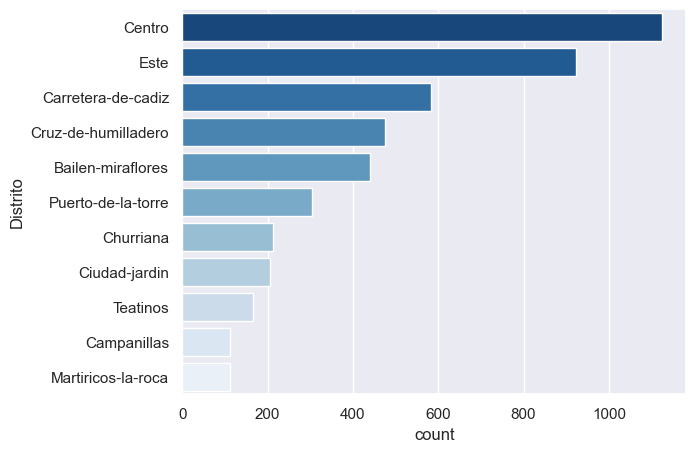

In [100]:
plt.figure(figsize=(6.5,5))
sns.countplot(y = data_idealista_venta["Distrito"], order=data_idealista_venta["Distrito"].value_counts().index, palette='Blues_r', native_scale=True);

Text(0.5, 1.0, '')

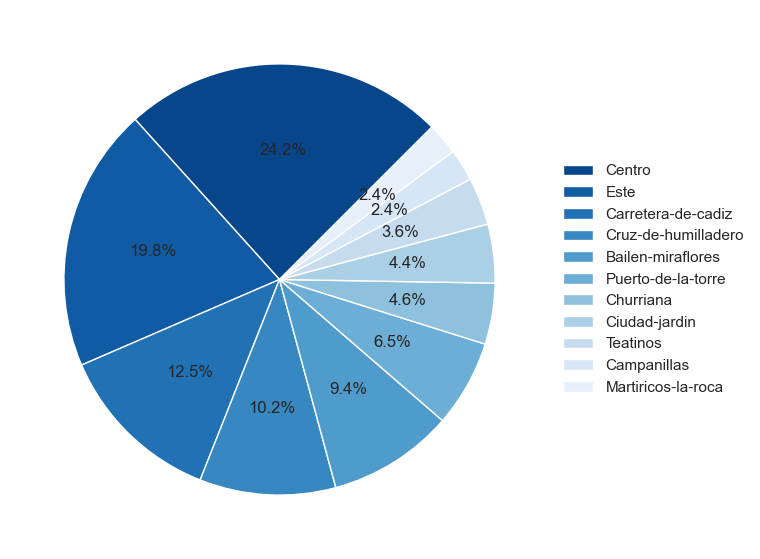

In [101]:
counts = data_idealista_venta["Distrito"].value_counts()

custom_palette = sns.color_palette('Blues_r', len(counts))

plt.figure(figsize=(7, 7))
plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=45, colors=custom_palette)
plt.legend(labels=counts.index, bbox_to_anchor=(1, 0.5), loc="center left")
# plt.title('Viviendas en venta / Distrito')
plt.title('')

### 1.2 ¿Que precio tienen las viviendas en Málaga ?

In [102]:
print(data_idealista_venta["Distrito"].value_counts())
print()
data_idealista_venta["Distrito"].describe()

Distrito
Centro                 1125
Este                    922
Carretera-de-cadiz      582
Cruz-de-humilladero     475
Bailen-miraflores       439
Puerto-de-la-torre      303
Churriana               213
Ciudad-jardin           205
Teatinos                166
Campanillas             112
Martiricos-la-roca      111
Name: count, dtype: int64



count       4653
unique        11
top       Centro
freq        1125
Name: Distrito, dtype: object

In [103]:

### Quitamos outliers del la columna 'Precio/m2' (quitamos los pisos muy caros y los pisos muy baratos)


data_idealista_venta = data_idealista_venta[data_idealista_venta['Precio/m2'] > 500][data_idealista_venta['Precio/m2'] < 11000]

In [104]:
print(data_idealista_venta["Distrito"].value_counts())
print()
data_idealista_venta["Distrito"].describe()

Distrito
Centro                 1111
Este                    910
Carretera-de-cadiz      579
Cruz-de-humilladero     475
Bailen-miraflores       438
Puerto-de-la-torre      303
Churriana               213
Ciudad-jardin           203
Teatinos                166
Campanillas             112
Martiricos-la-roca       97
Name: count, dtype: int64



count       4607
unique        11
top       Centro
freq        1111
Name: Distrito, dtype: object

In [105]:
### CLASIFICACION DE LOS DISTRITOS EN FUNCION DEL PRECIO/M2 - SERÁ UNA BUENA MÉTRICA?


data_idealista_venta.groupby('Distrito').aggregate({'Precio/m2':'mean'}).sort_values(by='Precio/m2', ascending=False).reset_index()

Distrito  Precio/m2
0                  Este    4087.38
1                Centro    3920.94
2    Carretera-de-cadiz    3391.82
3              Teatinos    3028.55
4   Cruz-de-humilladero    2475.10
5    Puerto-de-la-torre    2384.67
6     Bailen-miraflores    2257.71
7             Churriana    2249.38
8    Martiricos-la-roca    1905.41
9         Ciudad-jardin    1878.23
10          Campanillas    1876.37

El precio medio/m2 de la ciudad de Málaga es: 3187.49 Euros/m2
El precio mediano/m2 de la ciudad de Málaga es: 2862.1 Euros/m2
El precio más bajo/m2 de la ciudad de Málaga es: 502.5 Euros/m2
El precio más alto/m2 de la ciudad de Málaga es: 10787.67 Euros/m2


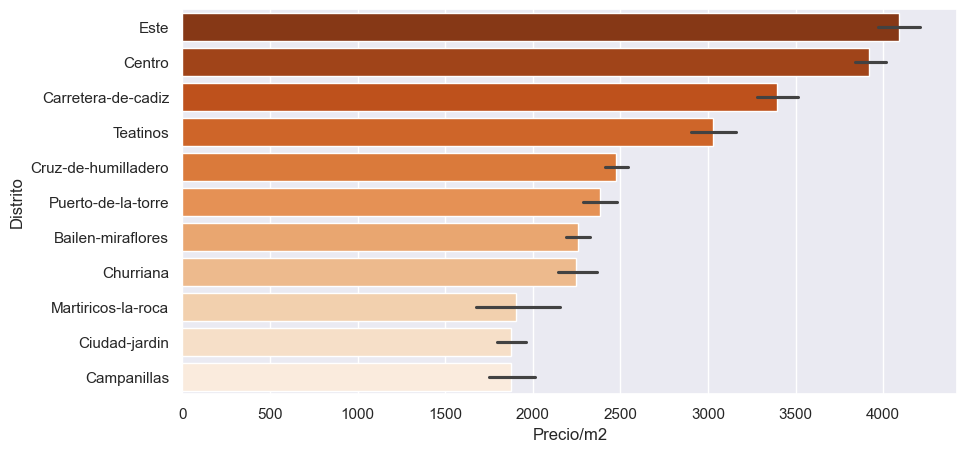

In [106]:
plt.figure(figsize=(10,5))
sns.barplot(data_idealista_venta, 
            x = "Precio/m2", 
            y = "Distrito",             
            palette='Oranges_r',
            order=data_idealista_venta.groupby('Distrito')['Precio/m2'].mean().sort_values(ascending=False).index,
            );

print('El precio medio/m2 de la ciudad de Málaga es:', round(data_idealista_venta['Precio/m2'].mean(), 2), 'Euros/m2')
print('El precio mediano/m2 de la ciudad de Málaga es:', data_idealista_venta['Precio/m2'].median(), 'Euros/m2')
print('El precio más bajo/m2 de la ciudad de Málaga es:', data_idealista_venta['Precio/m2'].min(), 'Euros/m2')
print('El precio más alto/m2 de la ciudad de Málaga es:', data_idealista_venta['Precio/m2'].max(), 'Euros/m2')

In [107]:

### CLASIFICACION DE LOS DISTRITOS EN FUNCION DEL PRECIO



data_idealista_venta.groupby('Distrito').aggregate({'Precio':'mean'}).sort_values(by='Precio', ascending=False).reset_index()

Distrito    Precio
0                  Este 840939.87
1             Churriana 457271.60
2                Centro 443820.49
3    Puerto-de-la-torre 400661.78
4              Teatinos 360801.52
5    Carretera-de-cadiz 358056.34
6           Campanillas 275712.49
7   Cruz-de-humilladero 257894.45
8         Ciudad-jardin 250089.35
9     Bailen-miraflores 218724.21
10   Martiricos-la-roca 197419.97

El precio medio de la ciudad de Málaga es: 447893.56 Euros
El precio mediano de la ciudad de Málaga es: 325000.0 Euros
El precio más bajo de la ciudad de Málaga es: 25600 Euros
El precio más alto de la ciudad de Málaga es: 4000000 Euros


count      4607.00
mean     447893.56
std      386078.21
min       25600.00
25%      210000.00
50%      325000.00
75%      525000.00
max     4000000.00
Name: Precio, dtype: float64

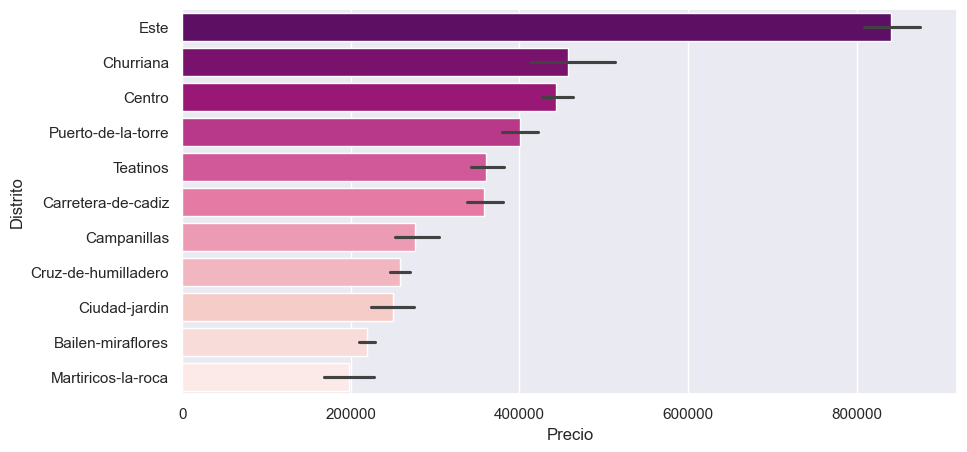

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(data_idealista_venta, 
            x = "Precio", 
            y = "Distrito",             
            palette='RdPu_r',
            order=data_idealista_venta.groupby('Distrito')['Precio'].mean().sort_values(ascending=False).index, 
            );

print('El precio medio de la ciudad de Málaga es:', round(data_idealista_venta['Precio'].mean(), 2), 'Euros')
print('El precio mediano de la ciudad de Málaga es:', data_idealista_venta['Precio'].median(), 'Euros')
print('El precio más bajo de la ciudad de Málaga es:', data_idealista_venta['Precio'].min(), 'Euros')
print('El precio más alto de la ciudad de Málaga es:', data_idealista_venta['Precio'].max(), 'Euros')

data_idealista_venta['Precio'].describe()

In [109]:

### COMO ES LA DISTRIBUCIÓN DE LOS PRECIOS POR DISTRITOS? CUAL ES LA MEDIDA DE TENDENCIA CENTRAL MÁS ADECUADA PARA DESCRIBIRLOS?
### BOXPLOTS


precio_por_distritos = data_idealista_venta[['Distrito', 'Precio']]

# dic_pr = {}
# dic_pr2 = {}

# for i in precio_por_distritos['Distrito'].unique():
#     dic_pr[precio_por_distritos[precio_por_distritos['Distrito'] == i]['Precio'].median()] = ' - precio mediano del distrito ' + str(i)
# display(dic_pr)

# print()

# for i in precio_por_distritos['Distrito'].unique():
#     dic_pr2[round(precio_por_distritos[precio_por_distritos['Distrito'] == i]['Precio'].mean(), 2)] = ' - precio medio del distrito ' + str(i)
# display(dic_pr2)

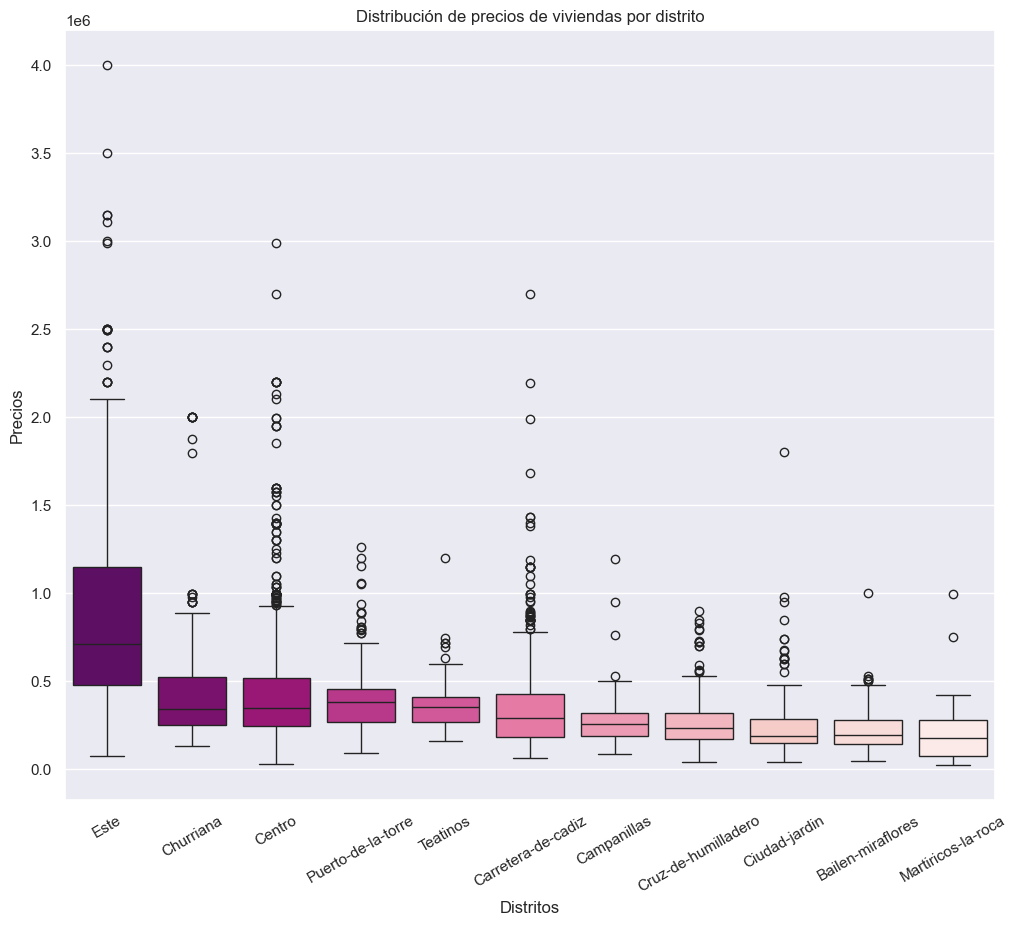

In [110]:
plt.figure(figsize=(12, 10)) 
sns.boxplot(x='Distrito', 
            y='Precio', 
            data=precio_por_distritos,
            order=data_idealista_venta.groupby('Distrito')['Precio'].mean().sort_values(ascending=False).index, 
            palette='RdPu_r')

plt.xlabel('Distritos')
plt.ylabel('Precios')
plt.title('Distribución de precios de viviendas por distrito')
plt.xticks(rotation=30);

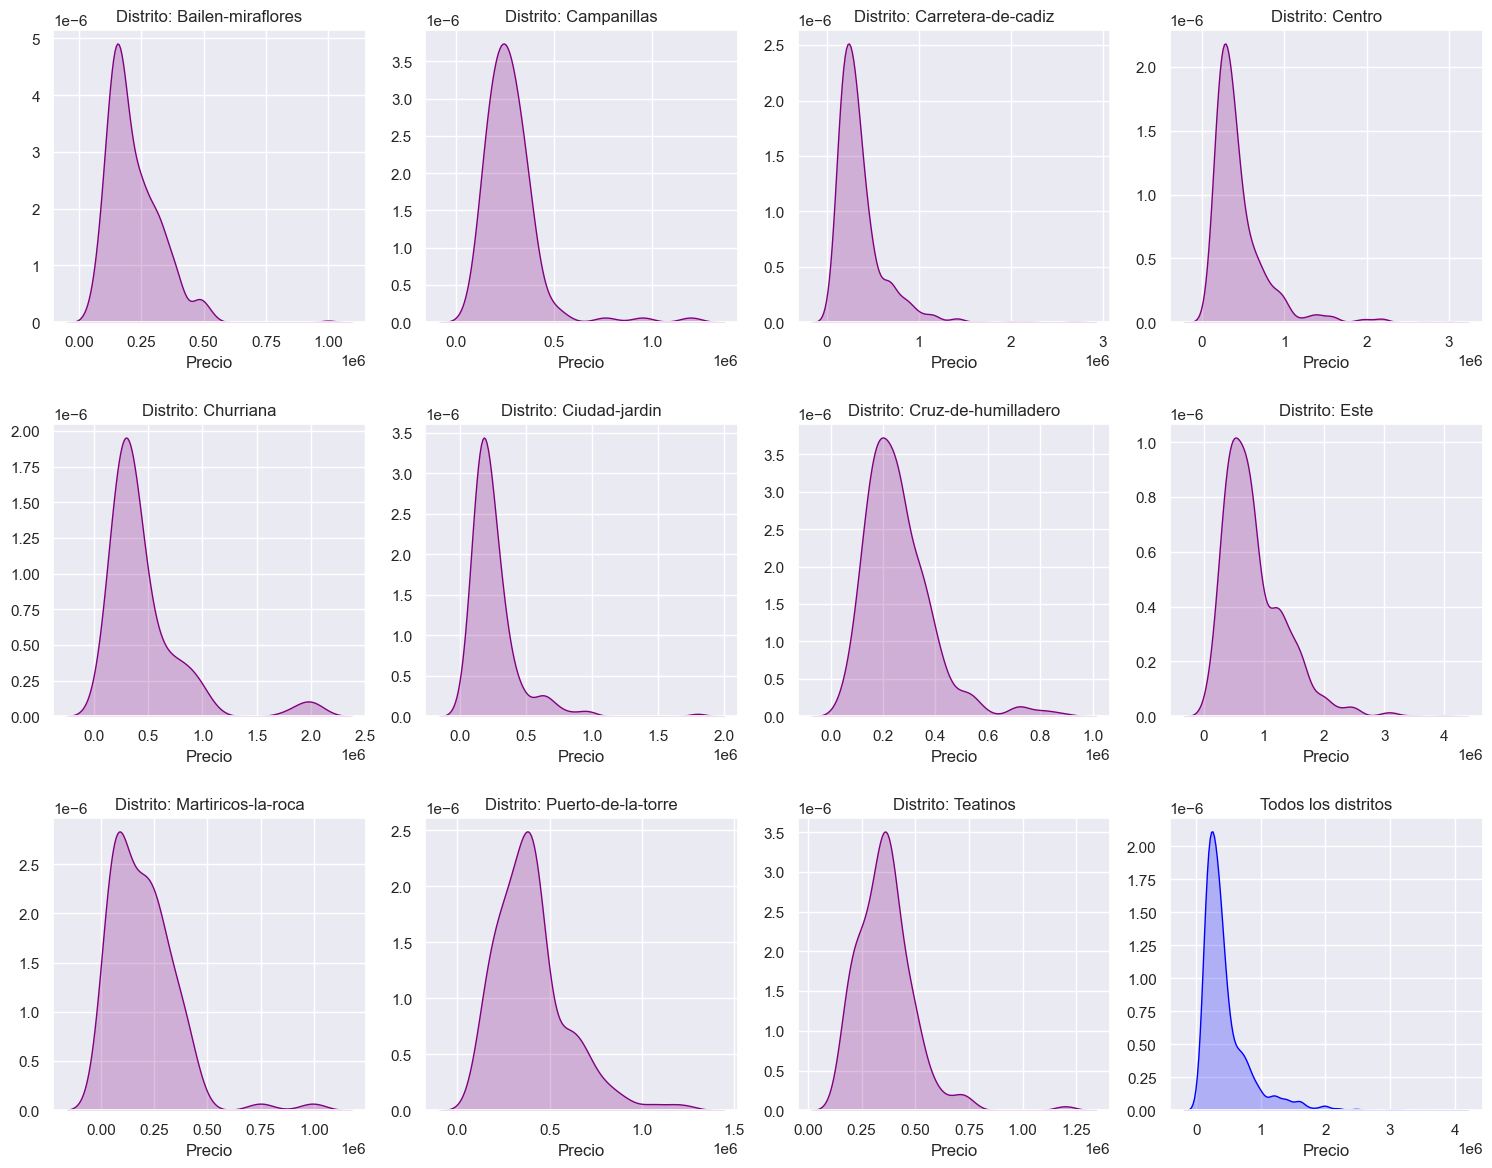

In [111]:

### COMO ES LA DISTRIBUCIÓN DE LOS PRECIOS POR DISTRITOS? CUAL ES LA MEDIDA DE TENDENCIA CENTRAL MÁS ADECUADA PARA DESCRIBIRLOS?
### DENSITY PLOTS


fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()

districts = precio_por_distritos['Distrito'].unique()

for i, distrito in enumerate(districts):
    ax = axes[i]
    sns.kdeplot(data=precio_por_distritos[precio_por_distritos['Distrito'] == distrito],
                x='Precio', 
                ax=ax, 
                label=distrito,
                fill=True,
                color='purple')
    ax.set_title(f'Distrito: {distrito}')
    ax.set_ylabel('')

ax=axes[11]
sns.kdeplot(data=precio_por_distritos, 
            x='Precio', 
            ax=ax, 
            label='Todos los distritos',
            color='blue',
            fill=True)
ax.set_title('Todos los distritos')
ax.set_ylabel('')

plt.tight_layout()

### 1.3 ¿Como podemos clasificar los precios de las viviendas? ¿De que variables depende el precio?

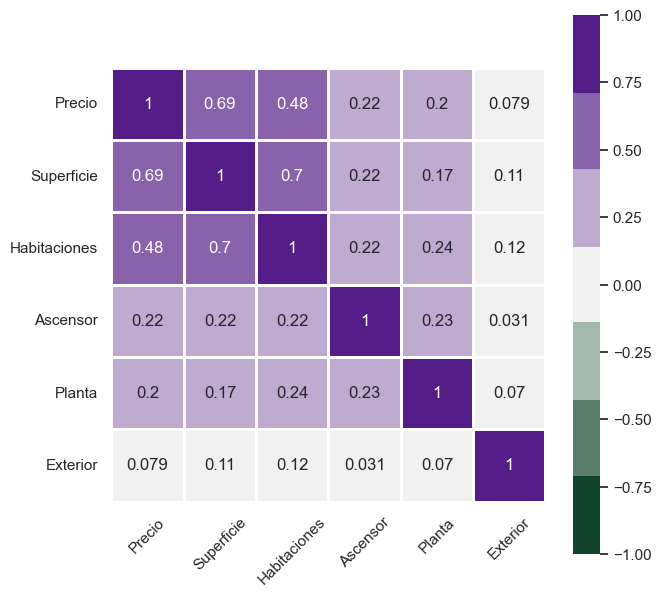

In [112]:

### MATRIZ DE CORRELACION ENTRE DISTINTOS PARÁMETROS DE UNA VIVIENDA
# Observamos que el precio es directamente proporcional a la superficie y al número de habitaciones 


plt.figure(figsize=(7,7))
sns.heatmap(data_idealista_venta[['Precio','Superficie','Habitaciones', 'Ascensor','Planta','Exterior']].corr(),
            vmin=-1, 
            vmax=1, 
            center=0,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, 
            linewidths=1);

plt.xticks(rotation=45);


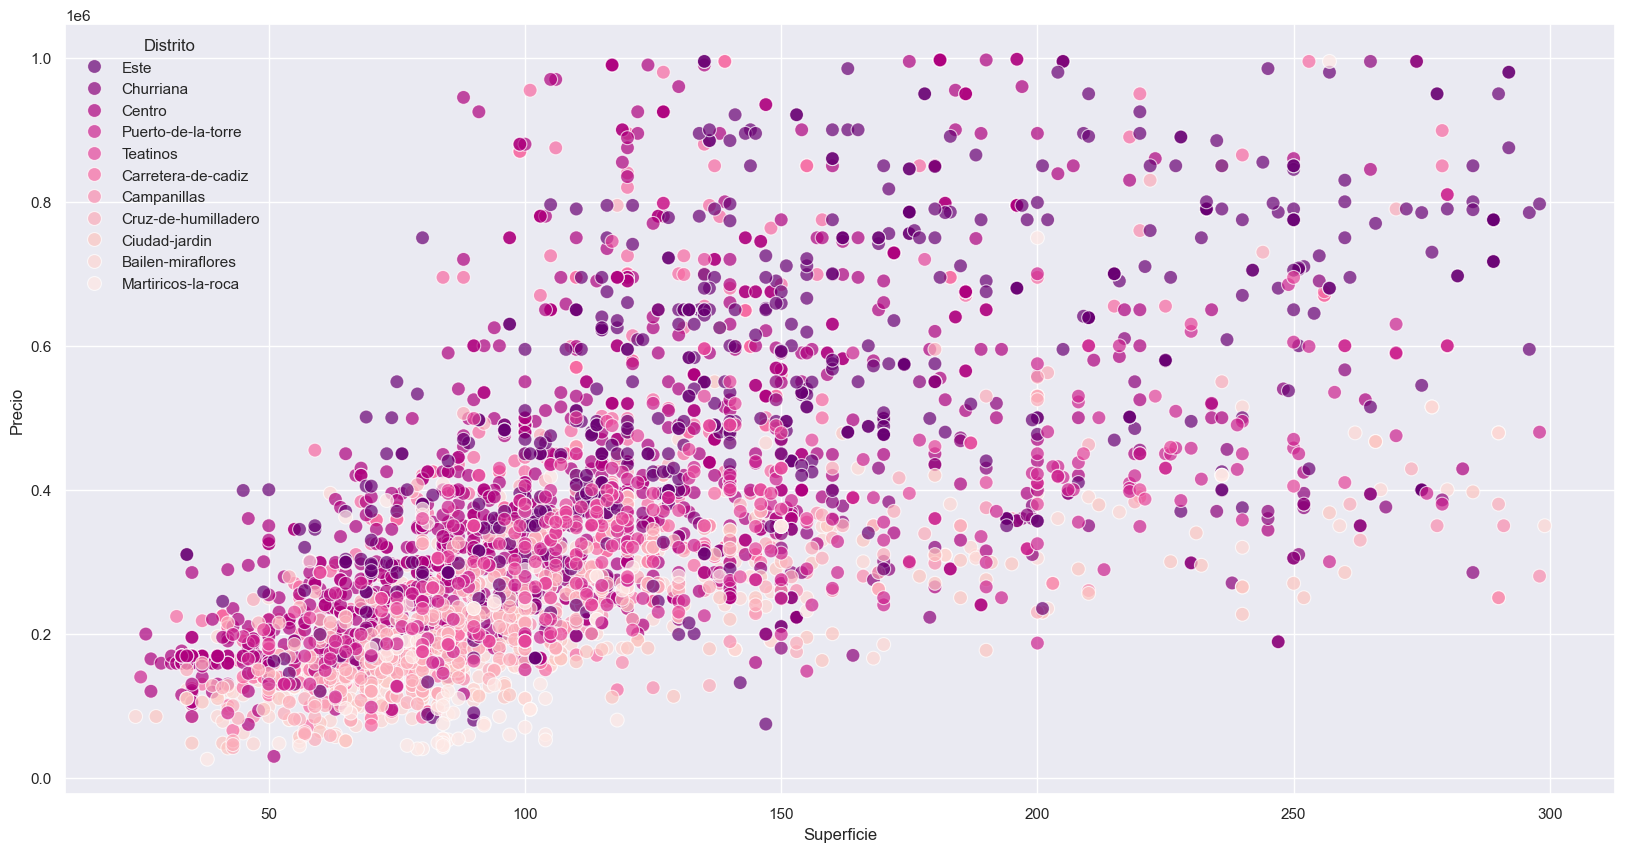

In [113]:

### SCATTERPLOT - CORRELACION DEL PRECIO CON LA SUPERFICIE, POR DISTRITO Ç
# Observamos que son directamente proporcionales


data = data_idealista_venta
data = data[data['Superficie'] < 300]
data = data[data['Precio'] < 1000000]

plt.figure(figsize=(20, 10))
sns.scatterplot(x='Superficie', 
                y='Precio', 
                hue='Distrito', 
                palette='RdPu_r', 
                data=data, 
                hue_order=data_idealista_venta.groupby('Distrito')['Precio'].mean().sort_values(ascending=False).index,
                s=100,
                alpha=0.7);

### 1.4 ¿De que tipo son los pisos que más se ponen a la venta ? (número de habitaciones y superficie)

In [114]:
print(data_idealista_venta['Habitaciones'].describe())
print()
print(data_idealista_venta['Habitaciones'].mode())

count   4607.00
mean       3.15
std        1.46
min        0.00
25%        2.00
50%        3.00
75%        4.00
max       20.00
Name: Habitaciones, dtype: float64

0    3
Name: Habitaciones, dtype: int64


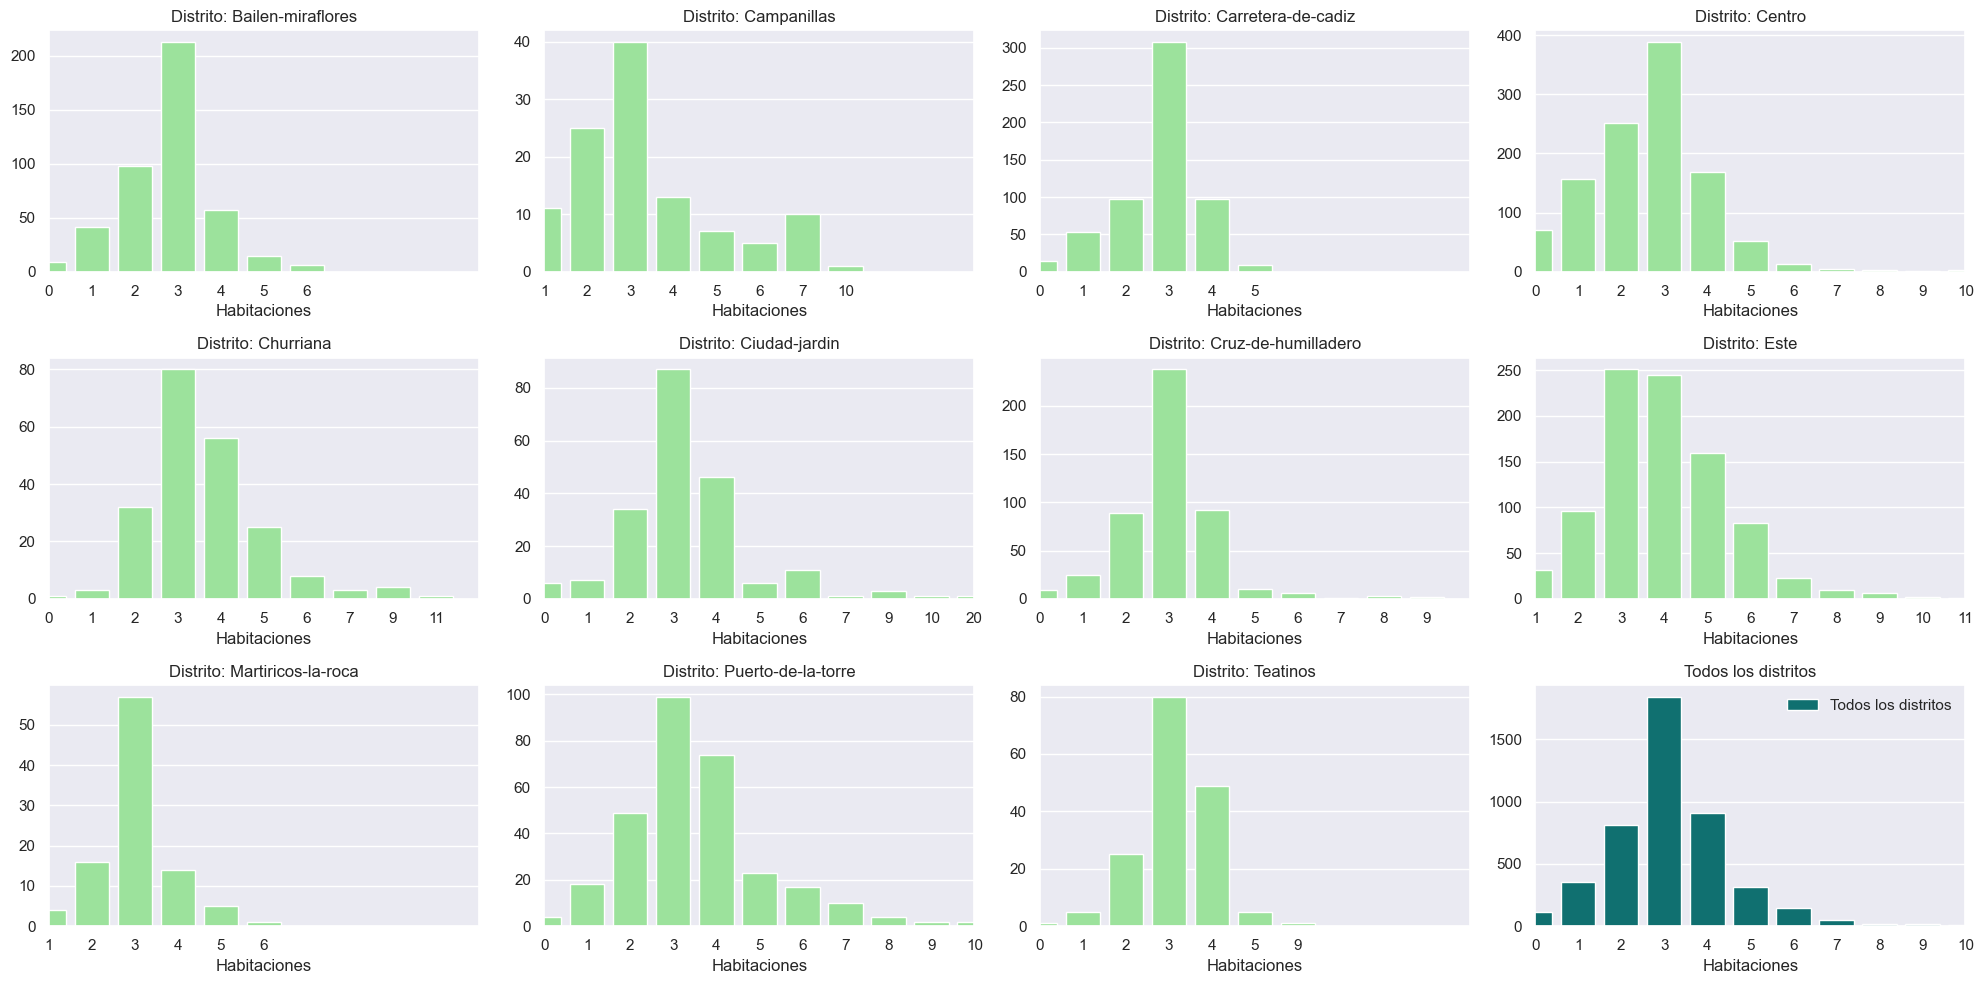

In [115]:

### COMO ES LA DISTRIBUCIÓN DE LOS PISOS POR SU Nº DE HABITACIONES POR DISTRITOS? CUAL ES LA MEDIDA DE TENDENCIA CENTRAL MÁS ADECUADA PARA DESCRIBIRLOS?
### DENSITY PLOTS


hab_por_distritos = data_idealista_venta[['Distrito', 'Habitaciones']]

fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()

districts = hab_por_distritos['Distrito'].unique()

for i, distrito in enumerate(districts):
    ax = axes[i]
    sns.countplot(data=hab_por_distritos[hab_por_distritos['Distrito'] == distrito],
                x='Habitaciones', 
                ax=ax, 
                label=distrito,
                fill=True,
                color='lightgreen',
                legend=False)
    ax.set_title(f'Distrito: {distrito}')
    ax.set_xlim(0,10)
    ax.set_ylabel('')

ax=axes[11]
sns.countplot(data=hab_por_distritos, 
            x='Habitaciones', 
            ax=ax, 
            label='Todos los distritos',
            color='teal',
            fill=True)
ax.set_title('Todos los distritos')
ax.set_xlim(0,10)
ax.set_ylabel('')

plt.tight_layout()

In [116]:
print(data_idealista_venta['Superficie'].describe())
print()
print(data_idealista_venta['Superficie'].median())


count   4607.00
mean     145.43
std      109.05
min       24.00
25%       80.00
50%      111.00
75%      164.50
max      972.00
Name: Superficie, dtype: float64

111.0


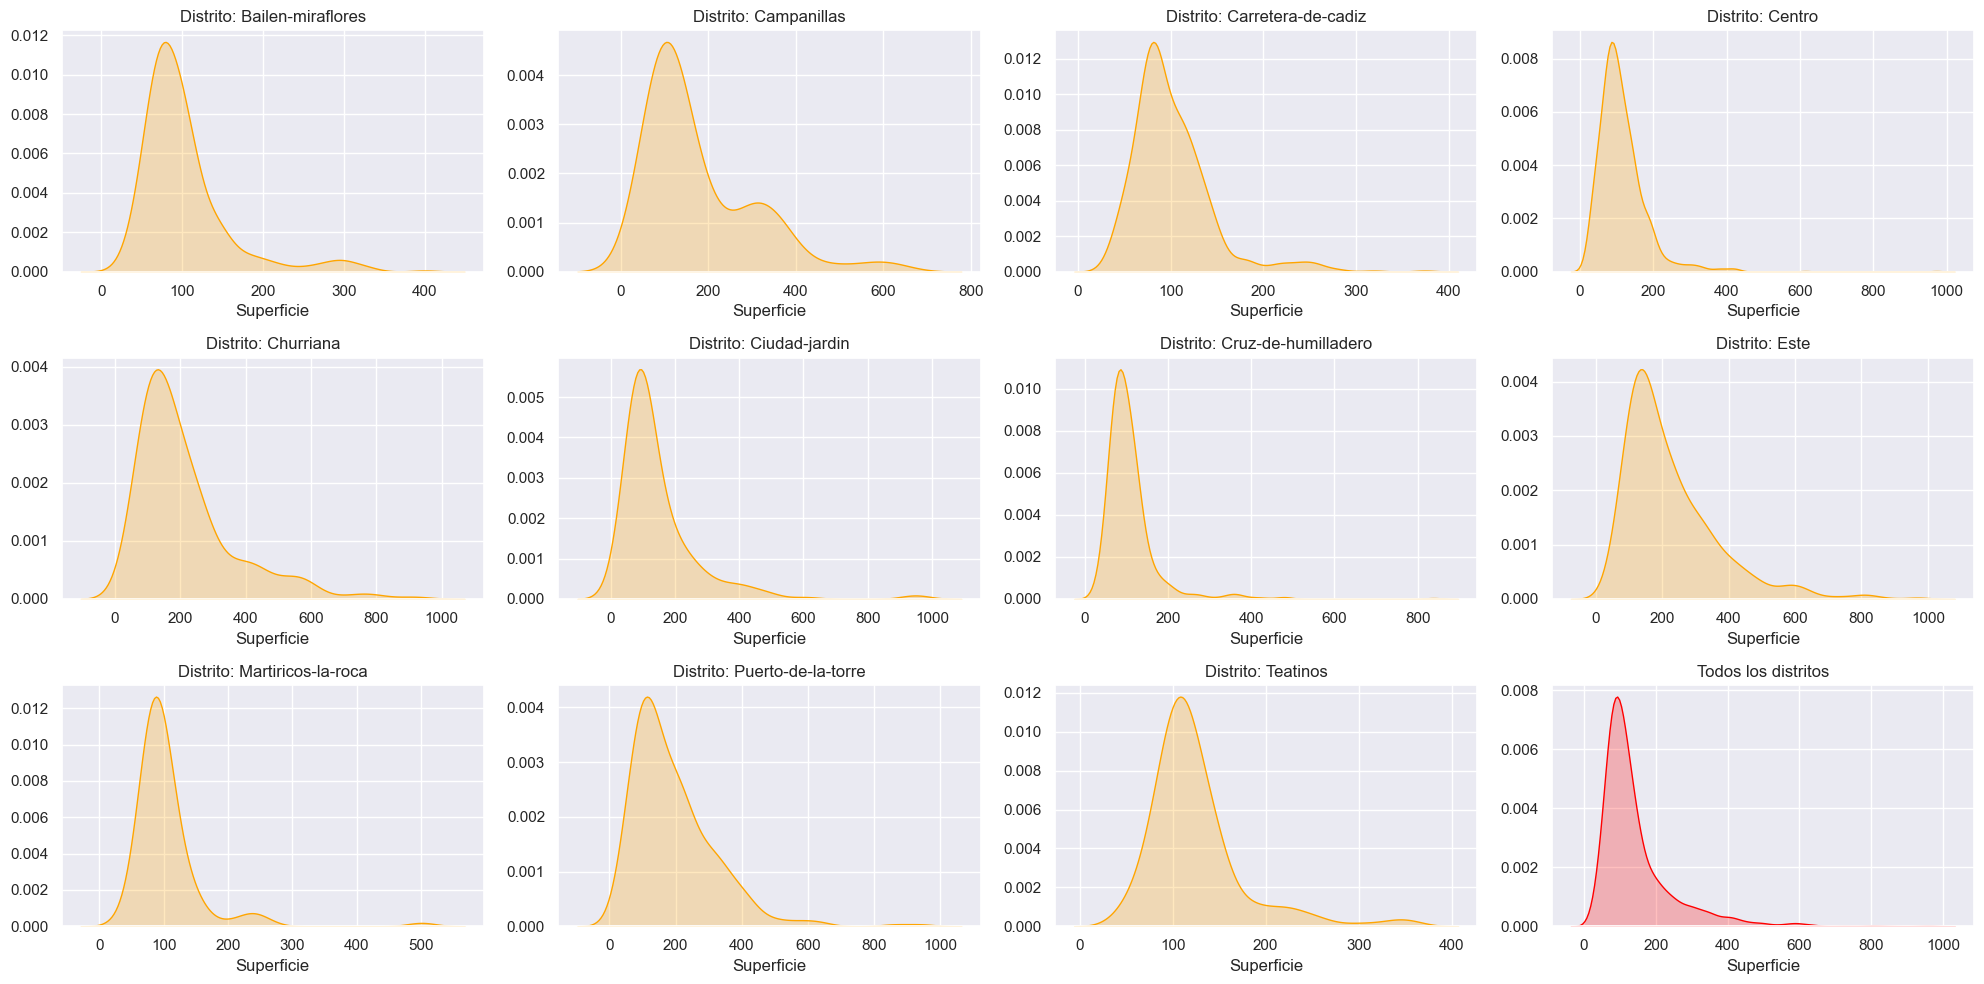

In [117]:

### COMO ES LA DISTRIBUCIÓN DE LOS PISOS POR SU Nº DE HABITACIONES POR DISTRITOS? CUAL ES LA MEDIDA DE TENDENCIA CENTRAL MÁS ADECUADA PARA DESCRIBIRLOS?
### DENSITY PLOTS



sup_por_distritos = data_idealista_venta[['Distrito', 'Superficie']]

fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()

districts = sup_por_distritos['Distrito'].unique()

for i, distrito in enumerate(districts):
    ax = axes[i]
    sns.kdeplot(data=sup_por_distritos[sup_por_distritos['Distrito'] == distrito],
                x='Superficie', 
                ax=ax, 
                label=distrito,
                fill=True,
                color='orange')
    ax.set_title(f'Distrito: {distrito}')
    ax.set_ylabel('')

ax=axes[11]
sns.kdeplot(data=sup_por_distritos, 
            x='Superficie', 
            ax=ax, 
            label='Todos los distritos',
            color='red',
            fill=True)
ax.set_title('Todos los distritos')
ax.set_ylabel('')

plt.tight_layout()

### 1.5 Resumén de los precios de los pisos en Málaga

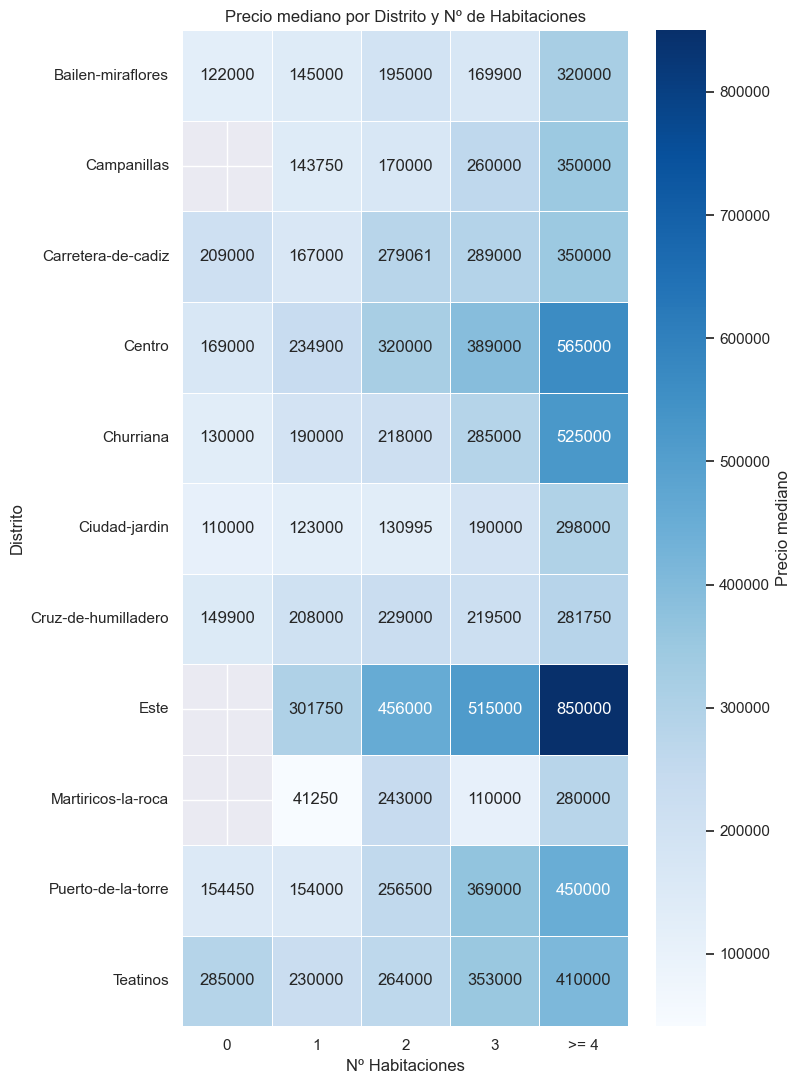

In [118]:

### MATRIZ DE CORRELACION - PRECIO MEDIANO POR DISTRITO Y POR Nº DE HABITACIONES


data = data_idealista_venta
data['Nº Habitaciones'] = data['Habitaciones'].apply(lambda x: x if x <= 3 else '>= 4')
heatmap_data = data.pivot_table(index='Distrito', columns='Nº Habitaciones', values='Precio', aggfunc='median')

plt.figure(figsize=(8, 11))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues", linewidths=.5,
            cbar_kws={'label': 'Precio mediano'})

plt.xlabel('Nº Habitaciones')
plt.ylabel('Distrito')
plt.title('Precio mediano por Distrito y Nº de Habitaciones')

plt.tight_layout()

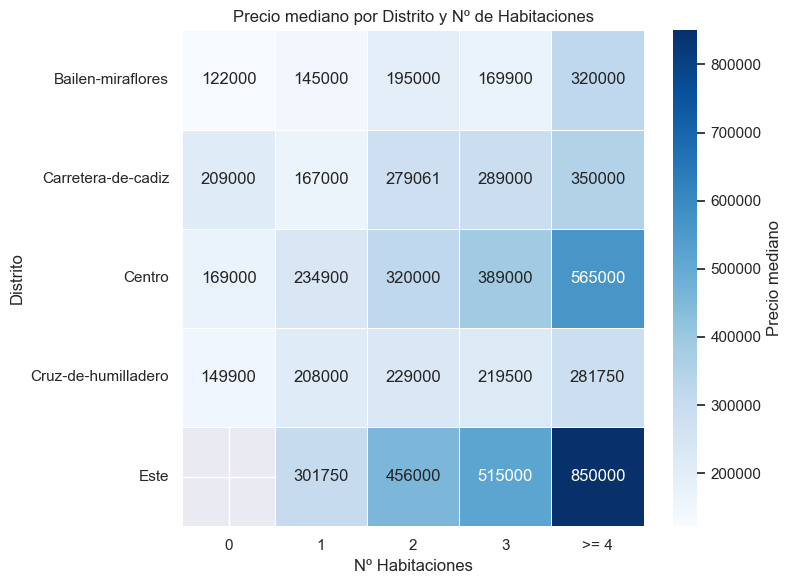

In [119]:
### TRAS ANALIZAR LOS DATOS DISPONIBLES PARA REALIZAR LA COMPARATIVA DE LA TABLA DE VIVIENDAS VACACIONALES, 
### DECIDIMOS CATEGORIZAR LOS PRECIOS POR Nª DE HABITACIONES Y ANALIZAR UNICAMENTE LOS DISTRITOS DONDE EXISTEN SUFICIENTES VIVIENDAS VACACIONALES


data = data_idealista_venta
data['Nº Habitaciones'] = data['Habitaciones'].apply(lambda x: x if x <= 3 else '>= 4')
heatmap_data = data.pivot_table(index='Distrito', columns='Nº Habitaciones', values='Precio', aggfunc='median').drop(['Teatinos', 'Churriana', 'Puerto-de-la-torre', 'Ciudad-jardin', 'Martiricos-la-roca', 'Campanillas'])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues", linewidths=.5,
            cbar_kws={'label': 'Precio mediano'})

plt.xlabel('Nº Habitaciones')
plt.ylabel('Distrito')
plt.title('Precio mediano por Distrito y Nº de Habitaciones')

plt.tight_layout()

## 2. AirDNA - Data Analysis

In [120]:
data_airdna

Título anuncio  Habitaciones  Baños  \
0       Apartamento Centro Málaga+Garaje Privado Gratis             1   1.00   
1                  Nice Flat in the center VFT/MA/00202             0   1.00   
2           Lovely apartment in the center VFT/MA/00204             1   1.00   
3     Relax, culture and beach in the heart of the c...             0   1.00   
4                                          Picasso Home             1   1.00   
...                                                 ...           ...    ...   
1961           Beach front Malagueta Miramar, 10 people             4   2.00   
1962       Acogedor apartamento junto al museo Picasso.             1   1.00   
1963                 La Mar Salada - MálagadeVacaciones             1   1.00   
1964                   Sw Calle Capitan-Charming Duplex             1   1.00   
1965    Prime Location/Brick Wall Suite/Walk Everywhere             0   1.00   

      Guests  Rating  Reviews  Ganancia (12 meses anteriores) (EUR)  \
0          4    4.80      810                              27010.26   
1          2    4.80      803                              17090.18   
2          2    4.80      720                              17183.36   
3          2    5.00      588                              22396.48   
4          5    4.80      563                              17610.94   
...      ...     ...      ...                                   ...   
1961      10    4.50       68                              79611.02   
1962       2    4.50       68                               9415.77   
1963       4    4.60       68                              33577.36   
1964       4    4.30       68                              21550.47   
1965       3    4.60       68                              21343.08   

      Ganancia potencial (EUR)  Ocupación  Tarifa media diaria (EUR)  \
0                     28506.77      84.20                      92.18   
1                     17684.94     100.00                      48.69   
2                     21824.55     100.00                      59.26   
3                     23691.99      99.42                      65.68   
4                     24919.90      99.61                      69.61   
...                        ...        ...                        ...   
1961                 102459.74      83.45                     328.97   
1962                  16421.41      83.42                      58.48   
1963                  39161.41      82.87                     126.23   
1964                  25030.45      82.62                      85.51   
1965                  21714.01      75.97                      77.61   

      Días disponibles (12 meses anteriores)   Lat  Long Distrito  
0                                        348 36.72 -4.43   Centro  
1                                        351 36.73 -4.42   Centro  
2                                        290 36.72 -4.42   Centro  
3                                        343 36.72 -4.42   Centro  
4                                        254 36.73 -4.42   Centro  
...                                      ...   ...   ...      ...  
1961                                     290 36.72 -4.41   Centro  
1962                                     193 36.72 -4.42   Centro  
1963                                     321 36.72 -4.41   Centro  
1964                                     305 36.72 -4.42   Centro  
1965                                     362 36.73 -4.42   Centro  

[1966 rows x 14 columns]

### 2.1 ¿Cuantas viviendas vacacionales hay en cada distrito de Málaga?

In [121]:

### MAPA DE MÁLAGA CON EL PERÍMETRO DE LOS DISTRITOS Y CON LA UBICACIÓN DE LAS VIVIENDAS VACACIONALES:

# - Datos GeoJSON de la base de datos abierta del Ayuntamiento de Málaga
# - Datos de latitud y longitud por vivienda vacacional - webscraping de AirDNA



import folium
import json



lista_distritos = ['Centro', 'Este', 'Carretera-de-cadiz', 'Cruz-de-humilladero', 'Bailen-miraflores', 
                  'Puerto-de-la-torre', 'Churriana', 'Ciudad-jardin', 'Teatinos', 'Campanillas', 'Martiricos-la-roca', 
                   ]
colors = ['#9e0142', '#d53e4f', '#f46d43', '#7d5042', '#ffcb00', '#ff88db', '#c4dc46', '#6cec5a', '#d238d6', '#3288bd', '#5e4fa2']
color_list = dict(zip(lista_distritos, colors))

mapa_pisos = folium.Map(location=[36.721170, -4.421760], zoom_start=11, width=800, height=800)

folium.raster_layers.TileLayer('CartoDB Positron').add_to(mapa_pisos)
# folium.LayerControl().add_to(mapa_pisos)




lista_distritos2 = lista_distritos.copy()
for d in range(len(lista_distritos2)):
    lista_distritos2[d].lower()

lista_colores = colors

for i in range(len(lista_distritos)):

    distrito_geojson_path = './GeoJSON Distritos Malaga/geoJson_Malaga_' + lista_distritos2[i] + '.geojson'

    with open(distrito_geojson_path, 'r') as geojson_file:
        geojson_data = json.load(geojson_file)    
        folium.Polygon(locations=geojson_data['features']['geometry']['coordinates'][0], color=lista_colores[i], fill=False).add_to(mapa_pisos)



for (index, row) in data_airdna.iterrows():
    if row.loc['Distrito'] in lista_distritos:
        color_di = color_list[row.loc['Distrito']]
    else:
        color_di = 'grey'
    folium.CircleMarker(location = [row.loc["Lat"], row.loc["Long"]], 
                  radius=5,
                  fill_color=color_di, 
                  fill_opacity=1, 
                  color=color_di, 
                  weight=0.1).add_to(mapa_pisos)
    
mapa_pisos


In [122]:
data_airdna["Distrito"].value_counts()

Distrito
Centro                 1573
Este                    153
Carretera-de-cadiz      111
Bailen-miraflores        40
Cruz-de-humilladero      40
Churriana                17
Puerto-de-la-torre       11
Ciudad-jardin            10
Martiricos-la-roca        6
Campanillas               4
Name: count, dtype: int64

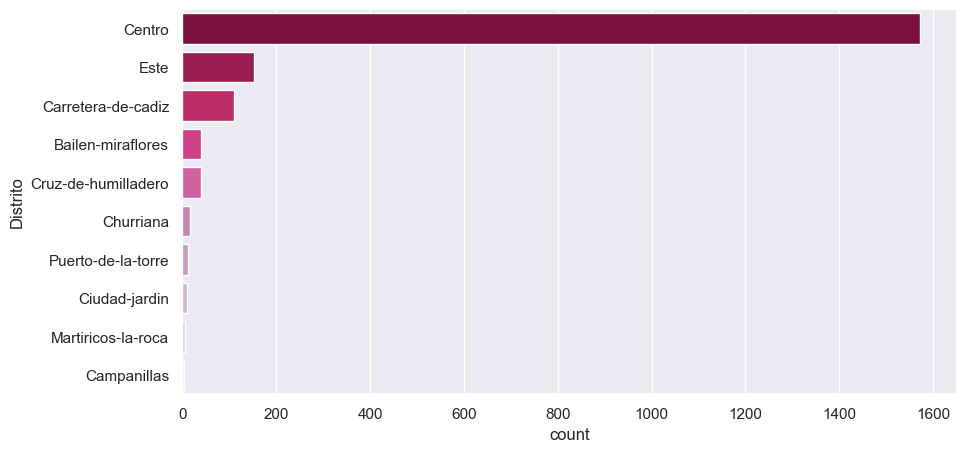

In [123]:

### DIAGRAMA DE BARRAS - CANTIDAD DE VIVIENDAS VACACIONALES POR DISTRITO



plt.figure(figsize=(10,5))
sns.countplot(y = data_airdna["Distrito"], 
              order = data_airdna["Distrito"].value_counts().index, 
              palette = 'PuRd_r');

Text(0.5, 1.0, '')

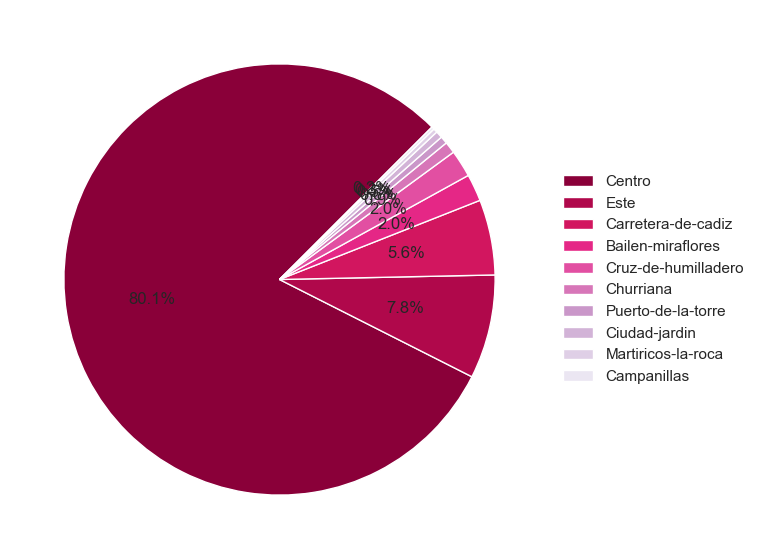

In [124]:
counts = data_airdna["Distrito"].value_counts()

custom_palette = sns.color_palette('PuRd_r', len(counts))

plt.figure(figsize=(7, 7))
plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=45, colors=custom_palette)
plt.legend(labels=counts.index, bbox_to_anchor=(1, 0.5), loc="center left")
# plt.title('Viviendas vacacionales / Distrito')
plt.title('')

In [125]:


### MAPA DE MÁLAGA CON EL PERÍMETRO DE LOS DISTRITOS Y COLOR MAP QUE INDICA LA CANTIDAD DE VIVIENDAS VACACIONALES


import folium
import json
from matplotlib.colors import to_hex



cmap_purd = plt.cm.get_cmap('PuRd')
num_colors = 11
colors2 = [to_hex(cmap_purd(i / (num_colors - 1))) for i in range(num_colors)]

lista_distritos = ['Centro', 'Este', 'Carretera-de-cadiz', 'Cruz-de-humilladero', 'Bailen-miraflores', 
                  'Puerto-de-la-torre', 'Churriana', 'Ciudad-jardin', 'Teatinos', 'Campanillas', 'Martiricos-la-roca', 
                   ]

mapa_pisos = folium.Map(location=[36.721170, -4.421760], zoom_start=11, width=800, height=800)

folium.raster_layers.TileLayer('CartoDB Positron').add_to(mapa_pisos)



lista_distritos2 = lista_distritos.copy()
for d in range(len(lista_distritos2)):
    lista_distritos2[d].lower()
lista_distritos2 = lista_distritos2[::-1]

lista_colores = colors2

for i in range(len(lista_distritos)):

    distrito_geojson_path = './GeoJSON Distritos Malaga/geoJson_Malaga_' + lista_distritos2[i] + '.geojson'

    with open(distrito_geojson_path, 'r') as geojson_file:
        geojson_data = json.load(geojson_file)    
        folium.Polygon(locations=geojson_data['features']['geometry']['coordinates'][0], color=lista_colores[i], fill=True, fill_color=lista_colores[i], fill_opacity=0.5).add_to(mapa_pisos)
    
mapa_pisos


In [126]:

### MATRIZ DE CORRELACION - CANTIDAD DE VIVIENDAS VACACIONALES POR DISTRITO Y POR TIPO DE VIVIENDA (Nº DE HABITACIONES) 


data_heatmap = data_airdna.groupby(['Distrito', 'Habitaciones']).count()['Título anuncio'].unstack()
data_heatmap.dropna(thresh=6, axis=1, inplace=True)
data_heatmap.fillna(value=0, inplace=True)
data_heatmap = data_heatmap + 0.1
data_heatmap = data_heatmap.T
data_heatmap = data_heatmap[data_airdna["Distrito"].value_counts().index.to_list()]
data_heatmap = data_heatmap.T
data_heatmap

Habitaciones             0      1      2      3     4    5
Distrito                                                  
Centro              177.10 710.10 465.10 168.10 45.10 5.10
Este                 10.10  68.10  44.10  17.10  5.10 2.10
Carretera-de-cadiz    5.10  35.10  36.10  28.10  5.10 2.10
Bailen-miraflores     2.10  21.10  11.10   6.10  0.10 0.10
Cruz-de-humilladero   1.10  16.10   8.10  11.10  2.10 1.10
Churriana             1.10   2.10   5.10   3.10  1.10 4.10
Puerto-de-la-torre    1.10   4.10   3.10   1.10  0.10 1.10
Ciudad-jardin         1.10   3.10   4.10   0.10  1.10 1.10
Martiricos-la-roca    0.10   2.10   2.10   1.10  0.10 0.10
Campanillas           0.10   2.10   0.10   2.10  0.10 0.10

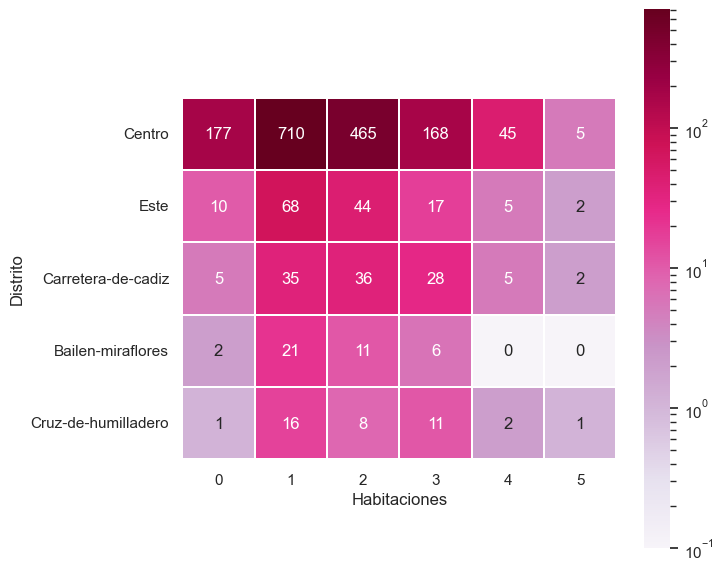

In [127]:
plt.figure(figsize=(7,7))
sns.heatmap(data_heatmap.drop(['Churriana', 'Puerto-de-la-torre', 'Ciudad-jardin', 'Martiricos-la-roca', 'Campanillas']),
            norm=LogNorm(),
            square=True,
            linewidths=.3,
            annot=True,
            fmt='.0f',
            cmap='PuRd');

# plt.scatter(lon, lat, label=None,
#             c=np.log10(population), cmap='viridis',
#             s=area, linewidth=0, alpha=0.5)

### 2.2 Cuales son los ingresos anuales de las viviendas vacacionales? 
#### (en los distritos más representativos y por nº de habitaciones)

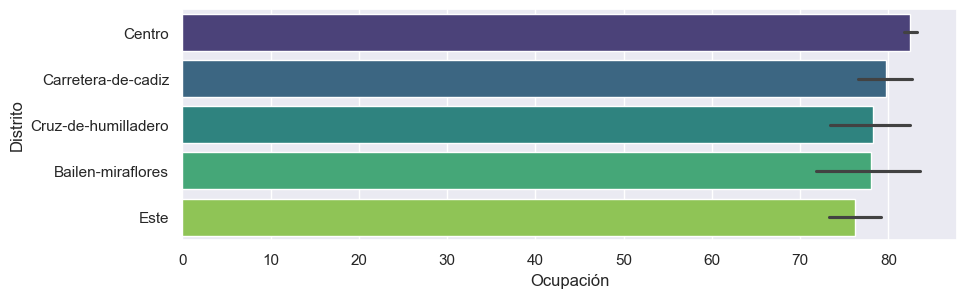

In [128]:

### DIAGRAMA DE BARRAS - OCUPACIÓN ANUAL MEDIA DE VIVIENDAS VACACIONALES POR DISTRITO

data_airdna_r = data_airdna.copy()
data_airdna_r = data_airdna_r[~data_airdna_r['Distrito'].isin(['Churriana', 'Puerto-de-la-torre', 'Ciudad-jardin', 'Martiricos-la-roca', 'Campanillas'])]

plt.figure(figsize=(10,3))
sns.barplot(data_airdna_r, 
            x = "Ocupación", 
            y = "Distrito", 
            estimator='mean',   # Cambia el default aggregate 
            ci=95,              # Confidence Interval = 95% (default) - podemos cambiarlo por 'sd' standard deviation, por 90, None, etc.
            palette='viridis', 
            order = data_airdna_r.groupby('Distrito')['Ocupación'].mean().sort_values(ascending=False).index,
            );

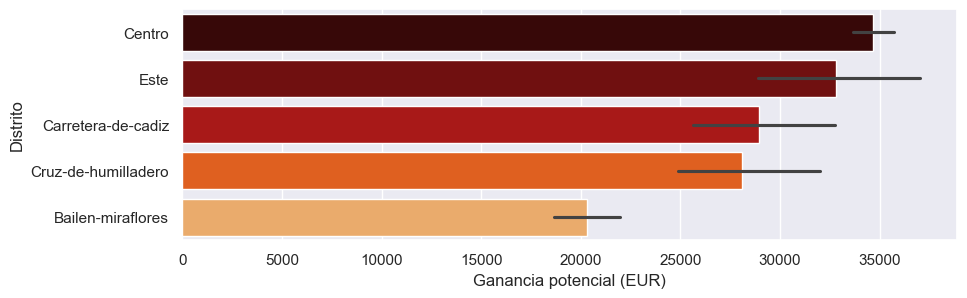

In [129]:

### DIAGRAMA DE BARRAS - GANANCIA POTENCIAL ANUAL MEDIA DE VIVIENDAS VACACIONALES POR DISTRITO


plt.figure(figsize=(10,3))
sns.barplot(data_airdna_r, 
            x = "Ganancia potencial (EUR)", 
            y = "Distrito", 
            palette='gist_heat', 
            order = data_airdna_r.groupby('Distrito')['Ganancia potencial (EUR)'].mean().sort_values(ascending=False).index,
            );

Nº Habitaciones            0        1        2        3     >= 4
Distrito                                                        
Bailen-miraflores   19805.91 19256.37 19287.43 19178.71      NaN
Carretera-de-cadiz  17409.03 20952.96 25415.08 29681.23 45523.86
Centro              24497.81 26771.81 34884.75 44120.54 62784.88
Cruz-de-humilladero 29638.75 19171.86 29315.78 37092.06 40091.93
Este                17663.47 20332.15 31753.78 30524.96 93653.36

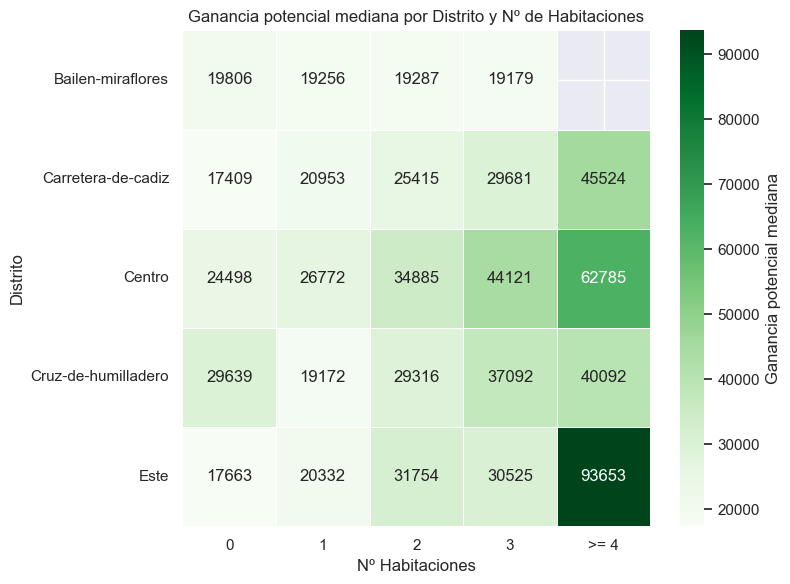

In [130]:

### MATRIZ DE CORRELACION - GANANCIA POTENCIAL ANUAL MEDIANA DE VIVIENDAS VACACIONALES POR DISTRITO Y POR TIPO DE VIVIENDA (Nº DE HABITACIONES) 



data2 = data_airdna
data2['Nº Habitaciones'] = data2['Habitaciones'].apply(lambda x: x if x <= 3 else '>= 4')
heatmap_data2 = data2.pivot_table(index='Distrito', columns='Nº Habitaciones', values='Ganancia potencial (EUR)', aggfunc='median').drop(['Churriana', 'Puerto-de-la-torre', 'Ciudad-jardin', 'Martiricos-la-roca', 'Campanillas'])

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data2, annot=True, fmt=".0f", cmap="Greens", linewidths=.5,
            cbar_kws={'label': 'Ganancia potencial mediana'})


# Add labels and a title
plt.xlabel('Nº Habitaciones')
plt.ylabel('Distrito')
plt.title('Ganancia potencial mediana por Distrito y Nº de Habitaciones')

plt.tight_layout()

heatmap_data2

## 3. Cálculos de Rentabilidad

In [ ]:
# %pip install numpy_financial

In [132]:

### CALCULAMOS DOS MÉTRICAS DE RENTABILIDAD, LA TIR Y EL ROI




import numpy_financial as npf 

data_roi = heatmap_data.copy()
data_roi.loc[:,:] = 0
data_tir = heatmap_data.copy()
data_tir.loc[:,:] = 0

for i in range(len(data_tir.index)):
    for j in range(len(data_tir.columns)):
        inversion = heatmap_data.iloc[i,j]
        ganancia_anual = heatmap_data2.iloc[i,j]
        if (not pd.isna(inversion)) and (not pd.isna(ganancia_anual)): 
            cashflows = [-inversion] + 20*[ganancia_anual*0.75]
            tir = npf.irr(cashflows)
            data_tir.iloc[i,j] = tir*100
            data_roi.iloc[i,j] = (ganancia_anual*0.75/inversion)*100
        elif pd.isna(ganancia_anual):    
            data_tir.iloc[i,j] = ganancia_anual
            data_roi.iloc[i,j] = ganancia_anual
        elif pd.isna(inversion):
            data_tir.iloc[i,j] = inversion
            data_roi.iloc[i,j] = inversion

In [ ]:
data_tir

Nº Habitaciones         0     1     2     3  >= 4
Distrito                                         
Bailen-miraflores   10.53  7.70  4.09  5.64   NaN
Campanillas           NaN  3.76   NaN  7.50   NaN
Carretera-de-cadiz   2.22  6.96  3.17  4.52  7.43
Centro               8.89  5.76  5.22  5.70  5.45
Churriana           13.36  5.44  1.22  2.77 15.66
Ciudad-jardin        5.52  0.51 10.04   NaN 16.16
Cruz-de-humilladero 13.69  3.31  7.22 11.14  8.64
Este                  NaN  0.10  0.42 -1.09  5.35
Martiricos-la-roca    NaN 16.63  3.33 13.79 14.30
Puerto-de-la-torre  -4.03 -0.81  0.77  7.17 15.84

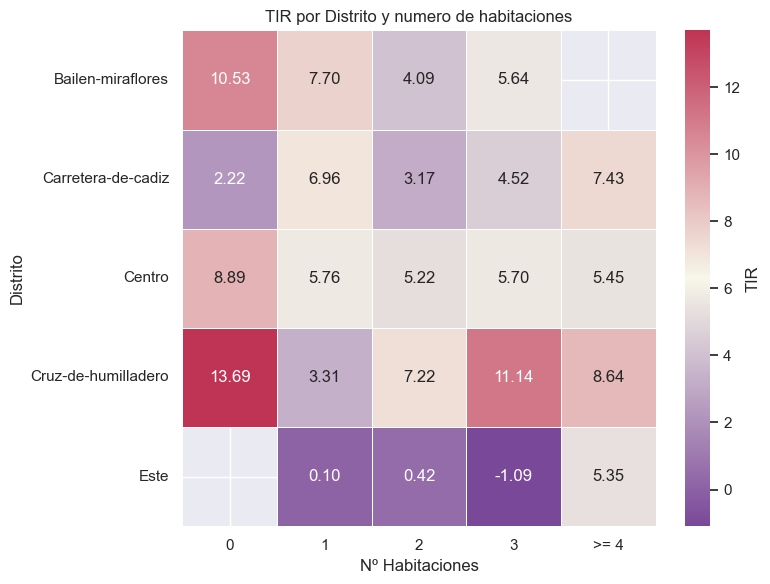

In [134]:

### CALCULAMOS LA TIR COMO MÉTRICA DE RENTABILIDAD



from matplotlib.colors import LinearSegmentedColormap

colors = [(122/255, 72/255, 153/255), (247/255, 247/255, 233/255), (191/255, 52/255, 84/255)]    
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)


heatmap_data3 = data_tir.copy()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data3, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=.5,     #"BrBG"
            cbar_kws={'label': 'TIR'})


# Add labels and a title
plt.xlabel('Nº Habitaciones')
plt.ylabel('Distrito')
plt.title('TIR por Distrito y numero de habitaciones')

plt.tight_layout()

In [135]:
data_roi

Nº Habitaciones         0    1    2     3  >= 4
Distrito                                       
Bailen-miraflores   12.18 9.96 7.42  8.47   NaN
Carretera-de-cadiz   6.25 9.41 6.83  7.70  9.76
Centro              10.87 8.55 8.18  8.51  8.33
Cruz-de-humilladero 14.83 6.91 9.60 12.67 10.67
Este                  NaN 5.05 5.22  4.45  8.26

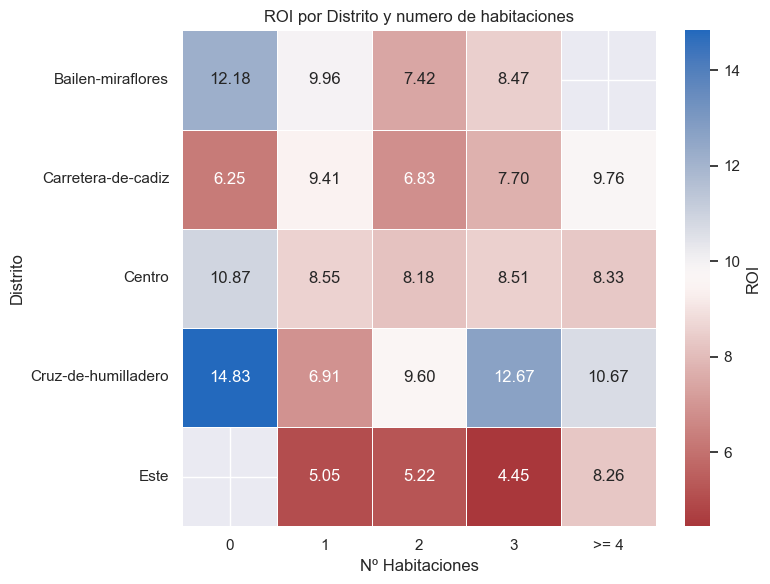

In [136]:

### SACAMOS EL ROI COMO SEGUNDA MÉTRICA, PERO SE OBSERVA QUE ES PROPORCIONAL CON LA TIR ASÍ QUE NOS QUEDAMOS CON LA TIR




heatmap_data4 = data_roi

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data4, annot=True, fmt=".2f", cmap="vlag_r", linewidths=.5,
            cbar_kws={'label': 'ROI'})


# Add labels and a title
plt.xlabel('Nº Habitaciones')
plt.ylabel('Distrito')
plt.title('ROI por Distrito y numero de habitaciones')

plt.tight_layout()